# Support Vector Machines

Support Vector Machine(SVM) is a powerful classifier that works both on linearly and nonlinearly separable data. SVM tries to find the “best” margin (distance between the line and the support vectors) that separates the classes. In this notebook we will demonstrate the use of our SVM, on different datasets, and using different kernels.

In [46]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
%config InlineBackend.figure_formats = ['svg'] # Makes the plots svg (visually better)
from svm import main
from test_data import TestLinear, TestNonLinear
import numpy as np
import matplotlib.pyplot as plt
import random

## The Primal Problem

In [61]:
# Generate dataset
w = np.array([1.0, 1.0])
b = 1.0
n_A = 200
n_B = 400
margin = 0.5

seed = random.randint(0,1000) #seed for the primal problems

### QP:

Training time: 0.0731 seconds


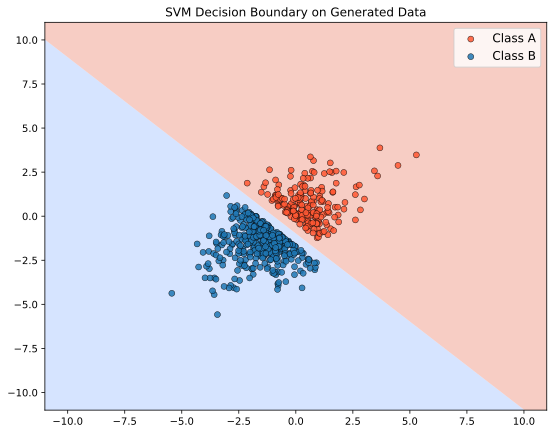

In [62]:
main(w, b, n_A, n_B, margin, "linear", "primal_QP", TestLinear, seed)

### SGD:

Training time: 1.9901 seconds


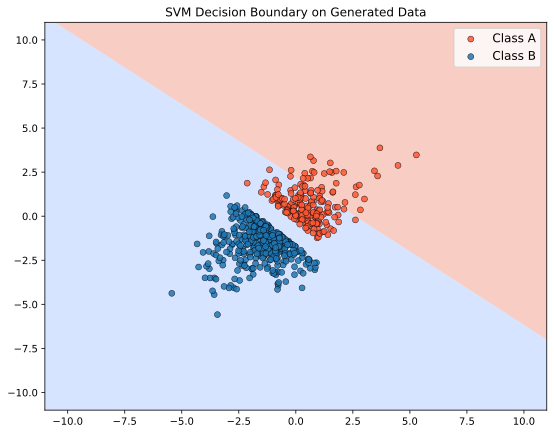

In [63]:
main(w, b, n_A, n_B, margin, "linear", "primal_SGD", TestLinear, seed)

## The Dual Problem

### Linear Kernel

In [51]:
# Generate dataset
w = np.array([1.0, 1.0])
b = 1.0
n_A = 2000
n_B = 2000
margin = 0.5
seed = random.randint(0,1000)

Iteration: 0, Line search triggered
Converged after 270 iterations.
Training time: 1.0583 seconds


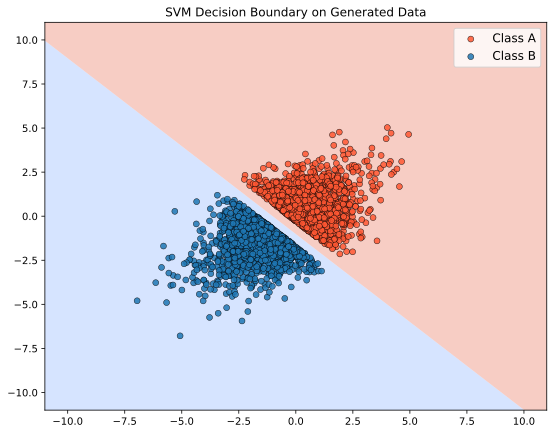

In [52]:
main(w, b, n_A, n_B, margin, "linear", "dual", TestLinear, seed)

### Gaussian Kernel

In [53]:
# Generate dataset
w = np.array([1.0, 1.0])
b = 1.0
n_A = 500
n_B = 400
margin = 0.5
seed = random.randint(0,1000)

Iteration: 0, Line search triggered
Converged after 3 iterations.
Training time: 0.0186 seconds


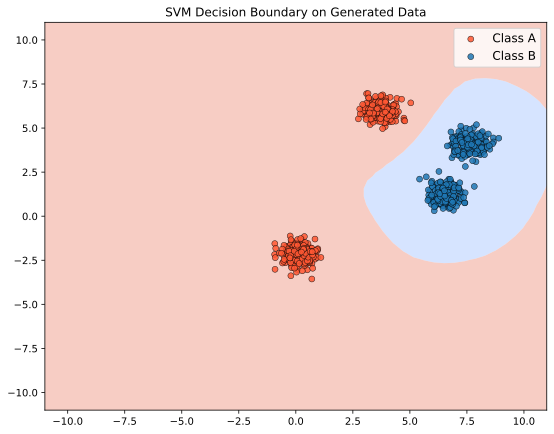

In [54]:
main(w, b, n_A, n_B, margin, "gaussian", "dual", TestNonLinear, seed=seed)

### Laplacian Kernel

In [55]:
# Generate dataset
w = np.array([1.0, 1.0])
b = 1.0
n_A = 500
n_B = 400
margin = 0.5
seed = random.randint(0,1000)

Iteration: 0, Line search triggered
Iteration: 318, Line search triggered
Iteration: 436, Line search triggered
Converged after 439 iterations.
Training time: 0.1381 seconds


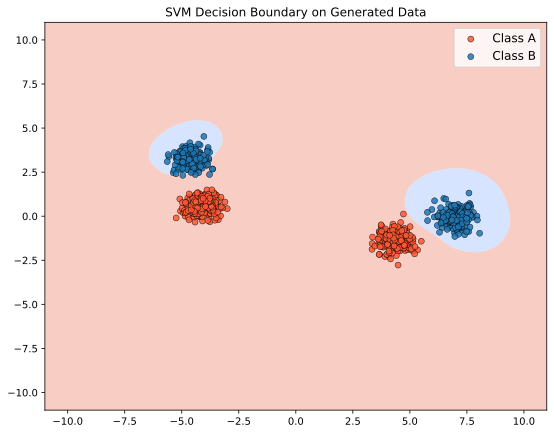

In [56]:
main(w, b, n_A, n_B, margin, "laplacian", "dual", TestNonLinear, seed=seed)

### Inverse Multiquadratic

In [57]:
# Generate dataset
w = np.array([1.0, 1.0])
b = 1.0
n_A = 500
n_B = 400
margin = 0.5
seed = random.randint(0,1000)

Iteration: 0, Line search triggered
Converged after 124 iterations.
Training time: 0.0430 seconds


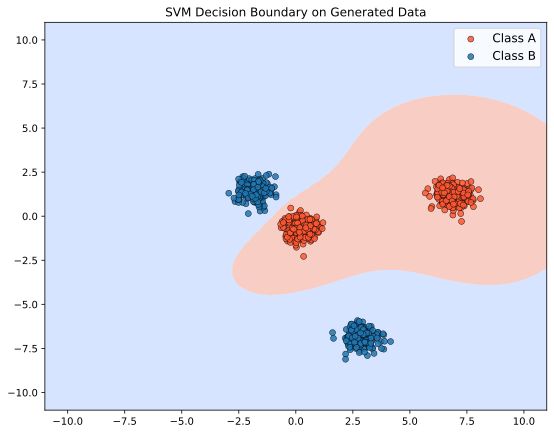

In [58]:
main(w, b, n_A, n_B, margin, "laplacian", "dual", TestNonLinear, seed=seed)